# Download data and packs

In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import gc
%matplotlib inline
%pylab inline


def downcast_dtypes(df):
    '''
        Changes column types in the dataframe: 
                
                `float64` type to `float32`
                `int64`   type to `int32`
    '''
    
    # Select columns to downcast
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols =   [c for c in df if df[c].dtype == "int64"]
    
    # Downcast
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols]   = df[int_cols].astype(np.int32)
    
    return df

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_train = pd.read_csv('onetwotrip_challenge_train.csv')
# df_test = pd.read_csv('onetwotrip_challenge_test.csv')

In [3]:
df = downcast_dtypes(df_train)
del df_train
gc.collect();

In [68]:
df_test.shape

(455011, 37)

In [4]:
df_train.head()

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,...,1,0,1,1,0,1,0,0,0,0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,...,1,0,1,0,0,0,0,0,0,0
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,...,1,0,1,1,0,0,0,0,0,0
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,...,1,0,1,1,0,0,0,0,0,0
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,...,1,0,0,1,0,0,0,0,0,0


In [117]:
df_train[[col for col in df_train.columns if 'field' in col]].describe().T

,count,mean,std,min,25%,50%,75%,max
field0,196056.0,28.413163,69.603944,0.000000,0.000000,0.000000,13.000000,500.000000
field1,196056.0,0.000912,1.009651,-0.859222,-0.471365,-0.238651,0.149205,82.142134
field2,196056.0,7.980363,2.757008,1.000000,6.000000,8.000000,10.000000,12.000000
field3,196056.0,7.867864,3.013659,1.000000,6.000000,8.000000,10.000000,12.000000
field4,196056.0,3.528966,12.692057,1.000000,1.000000,1.000000,2.000000,363.000000
field5,196056.0,0.556214,0.496831,0.000000,0.000000,1.000000,1.000000,1.000000
field6,196056.0,1.577911,5.614900,0.000000,0.000000,0.000000,0.000000,323.000000
field7,196056.0,1.265292,0.441489,1.000000,1.000000,1.000000,2.000000,2.000000
field8,196056.0,0.879366,0.325702,0.000000,1.000000,1.000000,1.000000,1.000000
field9,196056.0,0.023937,0.164366,0.000000,0.000000,0.000000,0.000000,4.000000


In [224]:
df_train.goal1.value_counts(normalize=True)

0    0.977858
1    0.022142
Name: goal1, dtype: float64

# Plot histograms

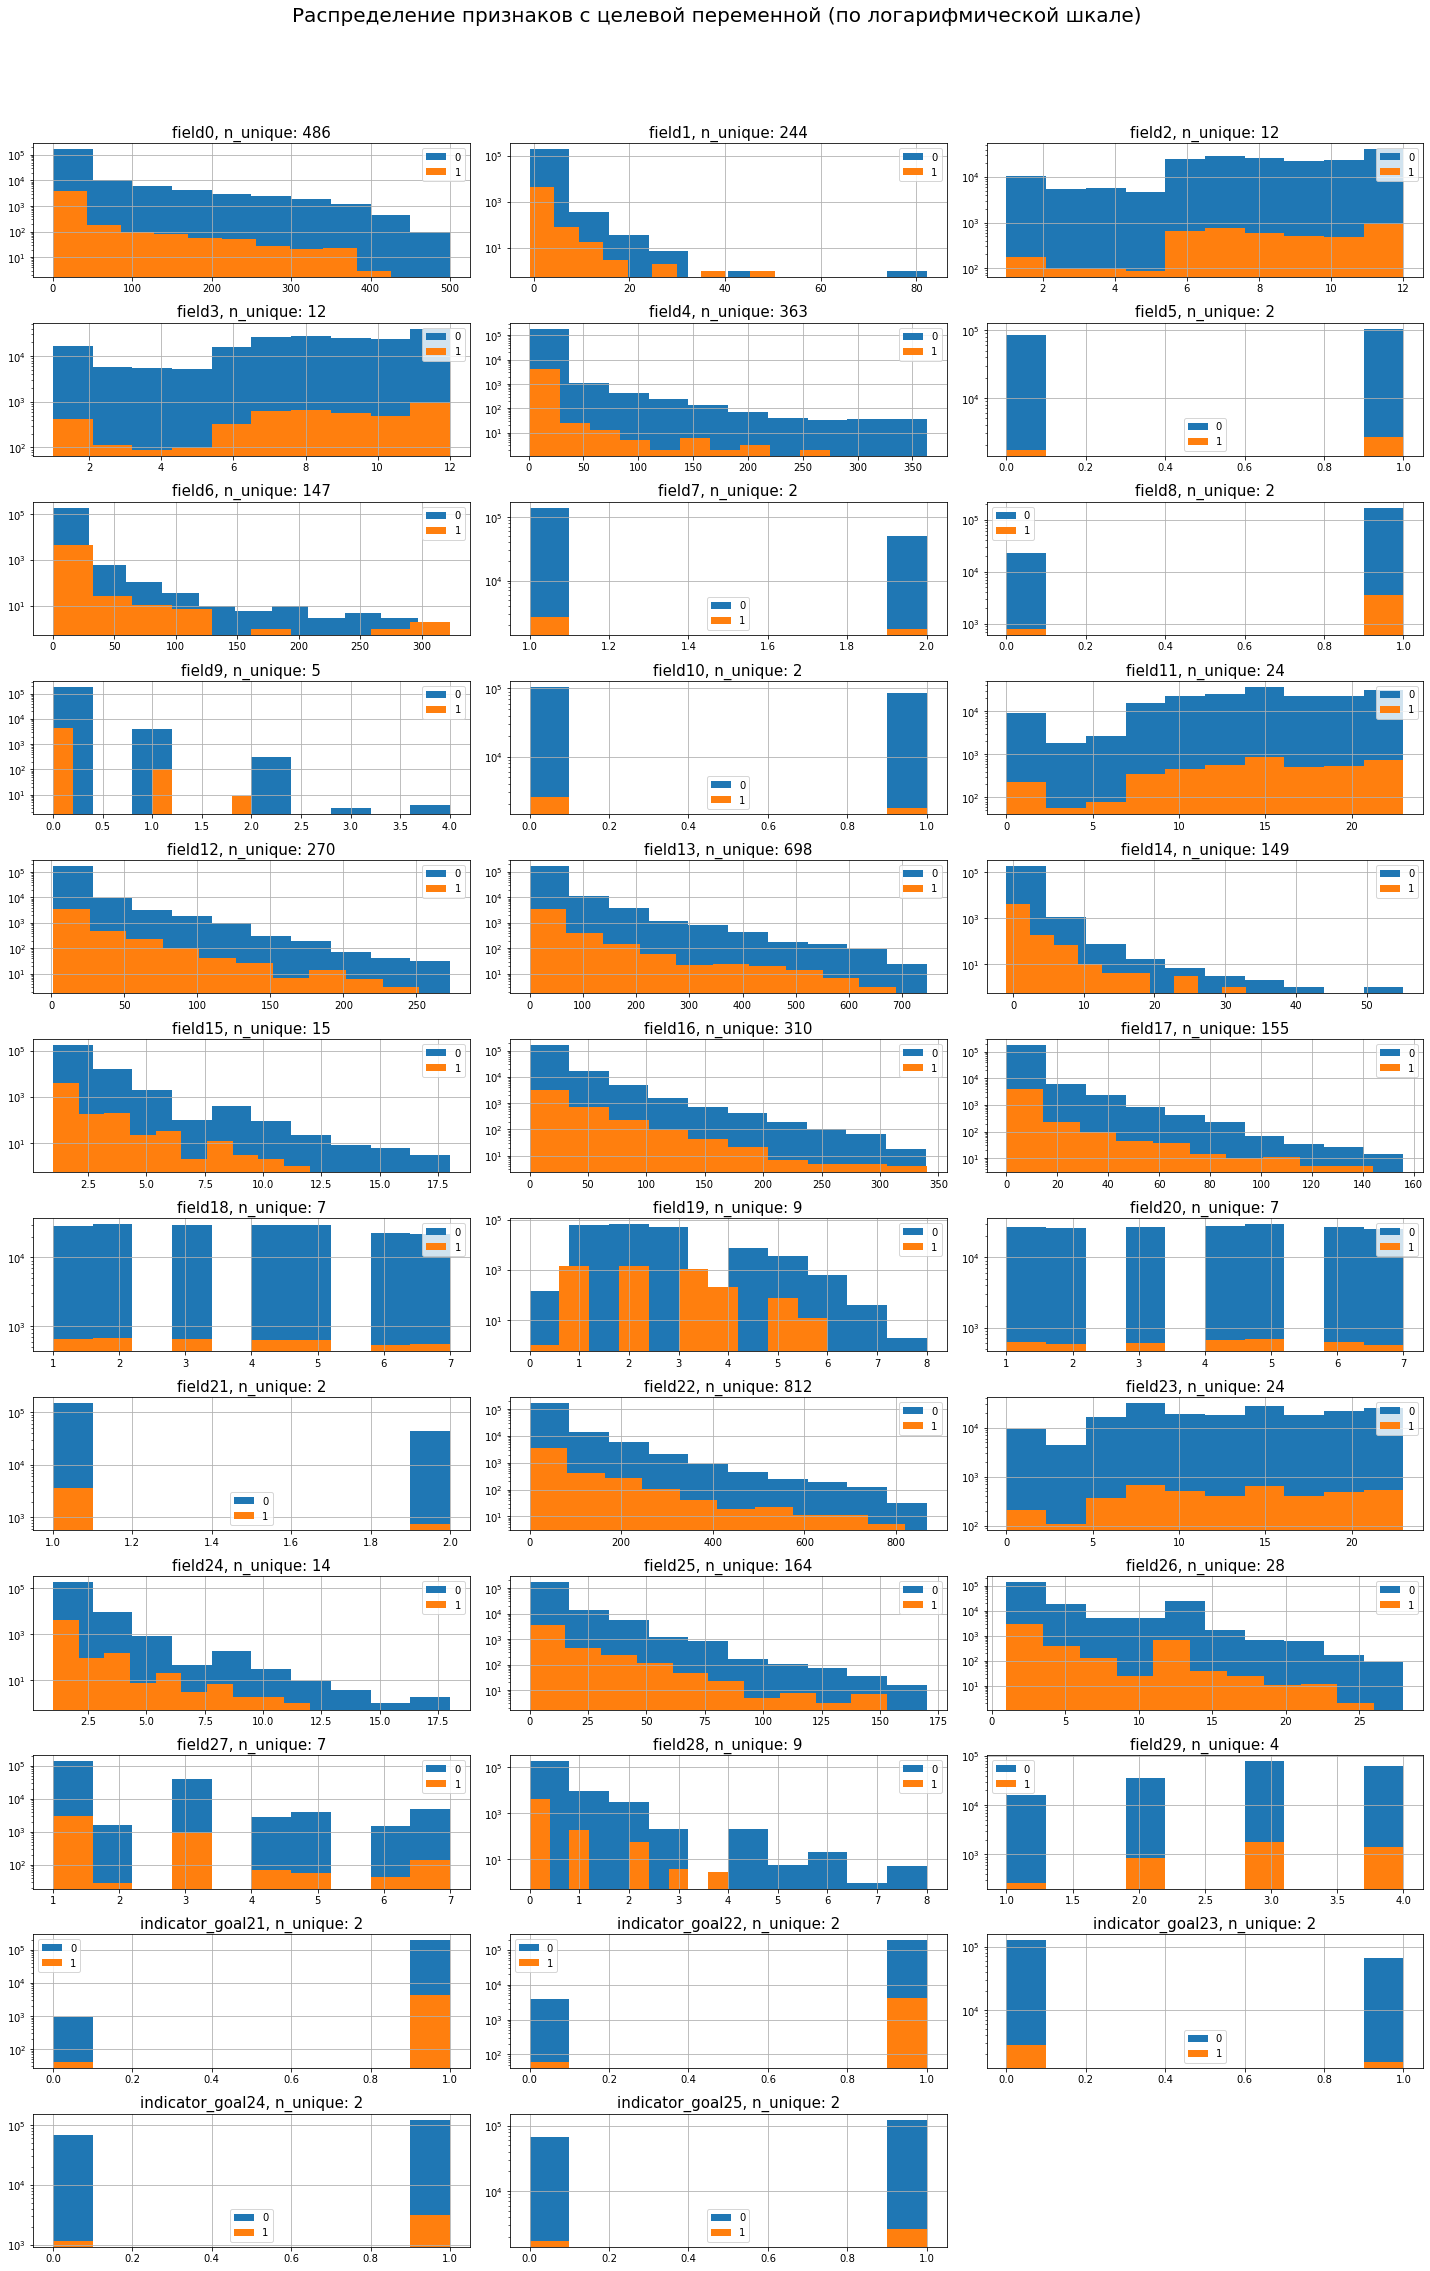

In [153]:
fields=list(filter(lambda x: ('field' in x)|('indicator' in x), df_train.columns))
plt.figure(figsize=[20,30])
for i, col in enumerate(fields):
    n_unique = df_train[col].nunique()
    ax = plt.subplot(12, 3, i+1)
    df_train.loc[df_train['goal1']==0][col].hist()
    df_train.loc[df_train['goal1']==1][col].hist()
    ax.set_title(f"{str(col)}, n_unique: {n_unique}", fontsize=15)
    ax.set_yscale('log')
    ax.legend(['0', '1'])
    
plt.suptitle('Распределение признаков с целевой переменной (по логарифмической шкале)', 
             y=1.05,  fontsize=20)    
plt.tight_layout();

In [151]:
fields=list(filter(lambda x: ('field' in x)|('indicator' in x), df_train.columns))
plt.figure(figsize=[20,30])
for i, col in enumerate(fields):
    nun_tr = df_train[col].nunique()
    nun_test = df_test[col].nunique()
    ax = plt.subplot(12, 3, i+1)
    df_train[col].hist(alpha=.5)
    df_test[col].hist(alpha=.5)
    ax.set_title(f"{str(col)}, nun_tr: {nun_tr}, nun_test: {nun_test}", fontsize=15)
    ax.set_yscale('log')
    ax.legend(['train', 'test'])

    
plt.suptitle('Распределение признаков по всем данным', 
             y=1.05,  fontsize=20)    
plt.tight_layout();

# garbige

In [186]:
userid_cnt = df_train['userid'].value_counts()
userid_cnt[userid_cnt > 1]

a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52    363
98e3b9eba8259c0fe0599cc0490a39e8d946942abcd43fa28ba1d2872f2a462b    222
a78176edc05b37528c4b559870f1c29c5cf1b0d7b2906db8e0a323d2b83e0bf4    185
6f88521de0b6c0f34e8c6675387055bc4b62331e681b5676549cadd149073f67    177
13a81409741819982c3bbc5452664081bfe7687c3c188ae4734d3c653985a1fa    149
                                                                   ... 
53d92cf868b0d0c596ffb543d30791eaaf0186854e994333a63bdef61177eb04      2
224149cac6a13a7093a0f324f312a4f26a86da44b96fdc93f8e149c3f037c299      2
2863bdaec34ee4b2d54d9a70eac723f987b3d67fe6a6522544a77d091e31e9e8      2
c7f51a6314653a7845e63600631e32eedf6fb5dbde67ac20e18dbc16690b0a4f      2
0c1db345170323031645e14e5ff2919f2ed34dc326415170aff1e776af7387d0      2
Name: userid, Length: 35753, dtype: int64

In [69]:
#userid_cnt=pd.DataFrame(userid_cnt[userid_cnt > 1]).reset_index(col_level=1)

In [125]:
user_count=df_train.groupby('userid')['userid'].transform('count')

In [149]:
user_cnt0 = df_train.query('goal1 == 0').groupby('userid')['userid'].transform('count')
user_cnt1 = df_train.query('goal1 == 1').groupby('userid')['userid'].transform('count')

In [249]:
#df_train.query('goal1==0').groupby(['userid', 'goal1'])['userid'].size()

In [230]:
# количество возвратов и количество клиентов, сделавших столько возвратов ( первая строка: 3688 
# клиентов сделали возврат только 1 раз)
return_cnt=df_train[df_train.goal1==1].groupby('userid')['userid'].size().sort_values(ascending=False)
pd.DataFrame({'userid': return_cnt.index, 'return_cnt': return_cnt.values}).groupby('return_cnt').size()

return_cnt
1     3688
2      221
3       38
4       10
5        2
6        1
7        1
8        1
10       1
16       1
dtype: int64

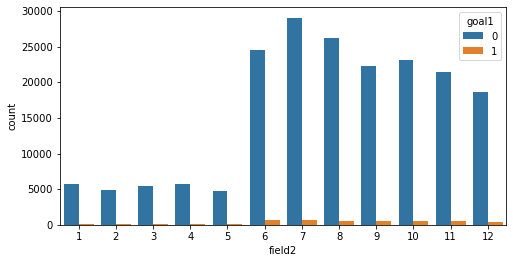

In [265]:
#  в разрезе по месяцам
plt.rcParams['figure.figsize'] = (8, 4)
sns.countplot(x='field2', hue='goal1', data=df_train);

In [53]:
# from itertools import groupby
# [ sum(1 for i in g) for k,g in groupby(a)]

cnt_continuous=np.diff(np.r_[0,np.flatnonzero(np.diff(df_train.goal1.values))+1,df_train.goal1.values.size])
cnt_continuous

array([83,  1, 20, ..., 24,  1, 50])

In [422]:
# fields = list(filter(lambda x: 'field' in x, df_train))
# fields.append('goal1')
# df_train[fields].iloc[80:90, :].T

In [420]:
# статистики по ряду из количества невозвращенных подряд билетов
pd.Series(cnt_continuous[::2]).describe()

count    4239.000000
mean       45.226469
std        44.410136
min         1.000000
25%        14.000000
50%        32.000000
75%        63.000000
max       427.000000
dtype: float64

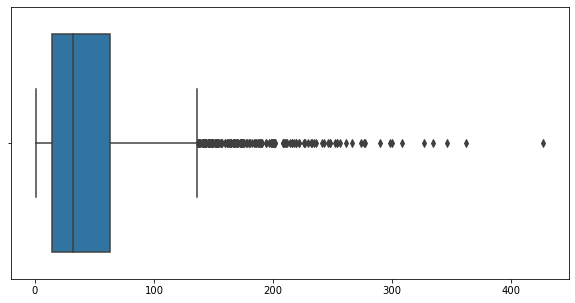

In [445]:
sns.boxplot(cnt_continuous[::2]);

In [421]:
# статистики по ряду из количества возвращенных подряд билетов
pd.Series(cnt_continuous[1::2]).describe()

count    4238.000000
mean        1.024304
std         0.160022
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
dtype: float64

In [462]:
pd.Series(cnt_continuous[1::2]).value_counts()

1    4139
2      95
3       4
dtype: int64

In [487]:
fields = list(filter(lambda x: 'field' in x, df_train))
fld=[f for f in fields if df_train[f].nunique() > 30]
fld.append('goal1')

In [486]:
# графики с переменными у которых больше 30 уникальных значений

# g = sns.PairGrid(df_train[fld], hue="goal1")
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter)
# g.add_legend();

In [499]:
print(f'train: {df_train.shape}, uniq: {len(set(df_train.userid))}'),
print(f'test: {df_test.shape}, uniq: {len(set(df_test.userid))}')

train: (196056, 43), uniq: 113902
test: (455011, 37), uniq: 264547


# Goals inspecting

In [528]:
gcol=list(filter(lambda x: 'goal' in x, df_train))

In [512]:
df_goals=df_train.query('( (goal21==1) | (goal22==1) | (goal23==1) | (goal24==1) | (goal25==1) )')
df_goals

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,...,1,0,1,1,0,1,0,0,0,0
6,6,6c6610f18ccd71f5ce664f9a840883d5d4b790d3adb88f...,0,0.071634,10,10,1,1,0,1,...,1,1,1,1,0,1,0,0,0,0
7,7,daa23cdeee4840e522def77d76c05e4c9a1b64980d0aaa...,0,-0.238651,10,11,1,1,1,1,...,1,1,1,0,0,1,1,0,0,0
8,8,c58f19409e035aafe7fd70b684ccd917402912c10b8a81...,0,-0.005937,8,8,1,1,0,1,...,1,1,0,1,0,1,0,0,0,0
12,12,7d0e29bbebac3d45005164662eefb42e15bd6176054d1e...,0,-0.471365,6,6,1,1,0,1,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196039,196039,9aa2834f0efec6f11882d0eb8fec46c0a572a2dc3bb7c7...,0,0.692205,8,8,1,1,0,1,...,1,1,1,1,0,1,0,0,0,0
196040,196040,4619b338b2386ae20ba1ac11c140f95863de1e06c0b4be...,0,-0.393794,6,6,1,1,0,1,...,1,1,0,0,0,1,0,0,0,0
196041,196041,94992ffe5824b6f7dc74fe0c23e12a0f0eac06ccbef81b...,5,0.537062,6,6,3,0,7,1,...,1,0,1,1,0,1,0,0,0,0
196042,196042,696a04640edba67137a7cc7d326d23d410f3aa0b8c4736...,0,-0.238651,7,7,1,1,0,2,...,1,0,0,0,0,1,0,0,0,0


In [532]:
df_goals[gcol]\
       .groupby('goal1')\
       .sum()

,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25
goal1,,,,,,,,,,
0,43638,43103,18250,30723,28757,6868,31981,7410,3870,2927
1,1616,1591,588,1313,1032,313,1070,180,545,33


# Write2csv

In [11]:
df_test['nunique']=df_test.groupby('userid')['userid'].transform('count')
df_test.to_csv('test_nunique.csv', index = None, header=True)

In [10]:
train_nunique = df_train.copy()
train_nunique.to_csv('train_nunique.csv', index = None, header=True)

In [278]:
def load_sumbission(df_test, res):
    '''
        @df_test: pd.DataFrame
        @res: np.array
    '''
    
    orderid = df_test['orderid']
    pred_res = pd.Series(res)
    subm = pd.concat([orderid, pred_res], axis=1, ignore_index=True)
    subm.columns = ['orderid','proba']
    
    return subm.to_csv('sumb.csv', index=False)
    

# Catplots

In [3]:
df_train.field1.value_counts(bins=4)

(-0.943, 19.891]    196033
(19.891, 40.641]        20
(40.641, 61.392]         2
(61.392, 82.142]         1
Name: field1, dtype: int64

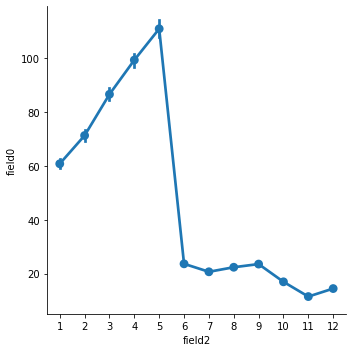

In [3]:
sns.catplot(x='field2', y='field0', data=df_train, kind='point')

In [ ]:
sns.catplot(x='field2', y='field0', data=df_train, col='goal1')

In [ ]:
# df['diff_f14f1'] = df.field14-df.field1
# sns.catplot(x='diff_f14f1', data=df.query("diff_f14f1<20 & diff_f14f1>-20"), col='goal1')

# field6

In [75]:
def find_missing(lst): 
    return [x for x in range(lst[0], lst[-1]+1)  
                               if x not in lst] 

missing_field6 = find_missing(np.sort(df_train.field6.unique()))
np.array(missing_field6)

array([ 72,  80,  81,  82,  95, 105, 112, 116, 117, 124, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 151, 152, 153, 155, 157, 158, 159,
       160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 179, 181, 184, 188, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 200, 201, 202, 203, 205, 207, 208, 209, 211,
       212, 213, 214, 215, 217, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254,
       255, 256, 257, 259, 260, 261, 262, 263, 264, 266, 268, 269, 270,
       272, 273, 274, 276, 277, 278, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 299, 300, 301,
       302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322])

In [76]:
len(np.sort(df_train.field6.unique()))

147

In [82]:
df_train.field17.unique()

array([  1,  57,  28,  17,   8,  26,   3,  12,  24,  18,  22,  15,  91,
        16,  34,  25,  32,  23,  37,  20,  14,   9, 126, 100,  21,   4,
         6,   2,  53,  13, 143,  44,  38,  55,  29,  59,  30,  82,  61,
        47,  11,   7,   0,  39, 135,  84,  70,  42,  41,  51,  36,  43,
        93, 110,  97,  33,   5,  58,  65,  85,  74, 106,  89,  64,  10,
        71,  68, 105,  73,  86,  62,  35, 138,  52, 124,  77,  60, 127,
        49,  94,  48,  67,  69,  96, 149,  95,  63,  27, 156, 123,  78,
        83,  72,  45,  75, 104,  66,  19, 109, 108,  99, 114, 145,  50,
       112,  56, 117, 122, 146,  46, 115, 144,  40, 147, 121, 139,  31,
       107, 128,  98, 131, 129, 134, 152, 111, 136,  79,  92, 103, 141,
       116,  80,  81,  54, 101,  90, 130,  87, 153, 119, 150, 142, 133,
       132, 155, 137, 120, 118,  76, 140, 148, 113, 102, 125,  88])

# f1

In [211]:
df_train.field1.mean(), df_train.field1.std()

(0.0009120241273191826, 1.009650813665239)

In [217]:
f1_unique = df_train.field1.unique()
f1_unique_sorted = np.sort(f1_unique)
                           
# np.diff(f1_unique_sorted)

In [218]:
(df_train.field1/0.07757136).head(10)

0    -8.076539
1    -5.076539
2    -7.076539
3    -3.076539
4    -9.076539
5    -4.076539
6     0.923461
7    -3.076539
8    -0.076539
9    20.923461
Name: field1, dtype: float64

In [219]:
f1int=(df_train.field1/0.07757136 - .076539).round()
f1int.head()

0   -8.0
1   -5.0
2   -7.0
3   -3.0
4   -9.0
Name: field1, dtype: float64

In [220]:
f1=(f1int+f1int.max())

In [222]:
len(f1.unique())

244

# f14

In [226]:
f14_unique_sorted = np.sort(df_train.field14.unique())
                           
# np.diff(f14_unique_sorted)

In [227]:
(df_train.field14/0.14006639).head()

0   -4.721393
1   -0.721393
2   -4.721393
3   -3.721393
4   -5.721393
Name: field14, dtype: float64

In [228]:
f14int=(df_train.field14/0.14006639 - .721393).round()
f14int.head()

0   -5.0
1   -1.0
2   -5.0
3   -4.0
4   -6.0
Name: field14, dtype: float64

In [229]:
f14=(f14int+f14int.max())

In [231]:
len(np.sort(f14.unique()))

244

In [60]:
df_train['f1'] = f1
df_train['f14'] = f14

In [117]:
pd.crosstab(df_train.f1, df_train.f14)

f14,383.0,384.0,385.0,386.0,387.0,388.0,389.0,390.0,391.0,392.0,...,752.0,763.0,766.0,777.0,780.0,793.0,876.0,972.0,1043.0,1453.0
f1,,,,,,,,,,,,,,,,,,,,,
1048.0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1049.0,0,291,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1050.0,0,0,5060,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1051.0,0,0,0,16014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1052.0,0,0,0,0,20712,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1541.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1637.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [131]:
# df_train.groupby(['f1', 'f14'])['f14', 'f1'].count()[200:]

In [101]:
df_train

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,f1,f14
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,...,1,1,0,1,0,0,0,0,1051.0,386.0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,...,1,0,0,0,0,0,0,0,1054.0,389.0
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,...,1,1,0,0,0,0,0,0,1052.0,387.0
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,...,1,1,0,0,0,0,0,0,1056.0,391.0
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,...,0,1,0,0,0,0,0,0,1050.0,385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,196051,e33b0b1abb0038261ea9fb5213b9aad000a7686edab9e4...,30,-0.083509,7,7,2,0,0,2,...,1,0,0,0,0,0,0,0,1058.0,393.0
196052,196052,ed64c2d35a57e9e8e8e5bc84f3addf5552e1691a52a75d...,104,-0.548937,11,11,2,0,0,1,...,0,0,0,0,0,0,0,0,1052.0,387.0
196053,196053,b74f63aae0b4a21b972a8a322f36e7935dbd44fe47762e...,12,0.692205,9,9,3,0,0,2,...,1,1,0,0,0,0,0,0,1068.0,403.0
196054,196054,ddd567f873d77e2118458a4d4bf51643c95df4bbad7dba...,0,-0.704079,11,1,1,1,0,1,...,1,1,0,0,0,0,0,0,1050.0,385.0


In [233]:
# maxid = df_train.query('userid == @df_train.userid.value_counts().index[1]')
# pd.crosstab([maxid.field6, maxid.field12], maxid.goal1)

In [63]:
df_train['unique'] = df_train.userid.map(df_train.userid.value_counts())

In [234]:
# pd.crosstab(df_train.unique, df_train.goal1)[:50]

# ALL field 1, 14

In [263]:
tr=pd.read_csv("onetwotrip_challenge_train.csv",usecols=['field1', 'field14'])#,dtype='float32')
tst=pd.read_csv("onetwotrip_challenge_test.csv", usecols=['field1', 'field14'])#, dtype='float32')

In [175]:
dfall=pd.concat([tr, tst])

In [275]:
dfall

,field1,field14
0,-0.626508,-0.661308
1,-0.393794,-0.101043
2,-0.548937,-0.661308
3,-0.238651,-0.521242
4,-0.704080,-0.801375
...,...,...
455006,2.553918,2.140019
455007,-0.238651,0.039024
455008,-0.161080,0.179090
455009,-0.704080,-0.801375


In [293]:
f14all_unique_sorted = np.sort(dfall.field14.unique())
c=Counter(np.diff(f14all_unique_sorted))
# np.diff(f14all_unique_sorted)
mean_diff=np.mean([i[0] for i in c.most_common(5)])

In [330]:
np.diff(f14all_unique_sorted) # 0.14006614685058594

array([ 0.14006639,  0.14006639,  0.14006639,  0.14006642,  0.1400664 ,
        0.14006639,  0.1400664 ,  0.14006639,  0.14006642,  0.14006639,
        0.14006642,  0.14006639,  0.14006639,  0.14006644,  0.14006639,
        0.14006639,  0.14006639,  0.14006639,  0.14006639,  0.14006639,
        0.14006639,  0.14006639,  0.14006639,  0.14006639,  0.14006639,
        0.14006639,  0.14006639,  0.14006639,  0.14006639,  0.14006639,
        0.14006639,  0.14006639,  0.14006639,  0.14006662,  0.14006639,
        0.14006615,  0.14006662,  0.14006615,  0.14006662,  0.14006615,
        0.14006662,  0.14006615,  0.14006662,  0.14006615,  0.14006662,
        0.14006615,  0.14006662,  0.14006662,  0.14006615,  0.14006662,
        0.14006615,  0.14006662,  0.14006615,  0.14006662,  0.14006615,
        0.14006662,  0.14006615,  0.14006662,  0.14006615,  0.14006662,
        0.14006615,  0.14006662,  0.14006615,  0.14006662,  0.14006615,
        0.14006615,  0.1400671 ,  0.14006615,  0.14006615,  0.14

In [307]:
all14=(dfall.field14/0.14006639 - .721393).round() # 0.14006614685058594 - .0000017).round()

In [308]:
all14.nunique()

199

In [309]:
all14_new=(all14 + all14.max())

In [310]:
all14_new[:tr.shape[0]].nunique(), all14_new[tr.shape[0]:].nunique()

(149, 184)

In [324]:
# f1all_unique_sorted = np.sort(dfall.field1.unique())
# c=Counter(np.diff(f1all_unique_sorted))
# c.most_common()

# np.diff(f1all_unique_sorted/0.07757)

In [326]:
(dfall.field1/0.07757).head(10)

0    -8.076681
1    -5.076628
2    -7.076663
3    -3.076593
4    -9.076698
5    -4.076611
6     0.923477
7    -3.076593
8    -0.076540
9    20.923828
Name: field1, dtype: float32

In [327]:
all1=(dfall.field1/0.07757 - .0766).round()
all1

0         -8.0
1         -5.0
2         -7.0
3         -3.0
4         -9.0
          ... 
455006    33.0
455007    -3.0
455008    -2.0
455009    -9.0
455010     3.0
Name: field1, Length: 651067, dtype: float32

In [328]:
all1_new=(all1 + all1.max())

In [329]:
all1_new[:tr.shape[0]].nunique(), all1_new[tr.shape[0]:].nunique()

(244, 296)

In [323]:
all14_new[:tr.shape[0]].nunique(), all14_new[tr.shape[0]:].nunique()

(149, 184)

# features are related to each other

In [12]:
import numpy as np
from IPython.display import Image

In [17]:
def plotc(c1,c2, target=df.goal1):

    fig = plt.figure(figsize=(16,8))
    sel = np.array(list(target))

    plt.scatter(c1, c2, c=sel, s=100)
    plt.xlabel(c1.name)
    plt.ylabel(c2.name)

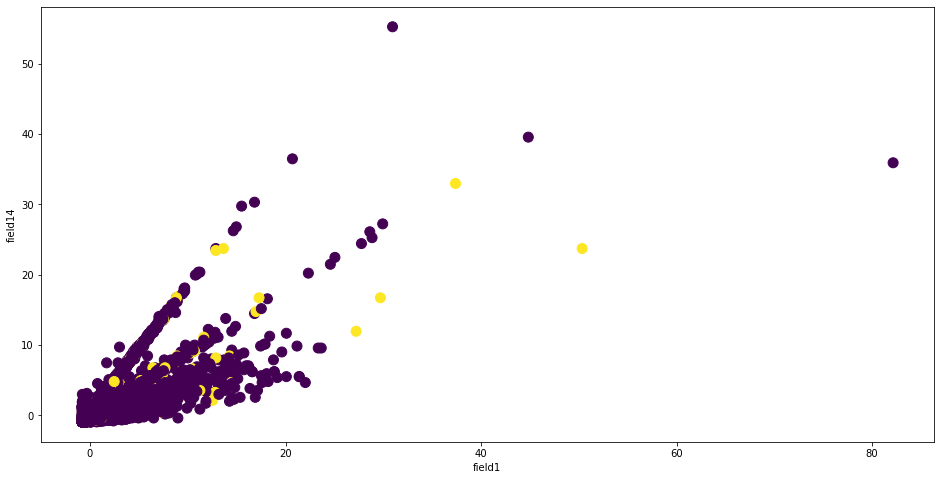

In [19]:
plotc(df.field1, df.field14)

In [4]:
cols_to_rename = {'field0': 'ndays_from_last',
                 'field2': 'month_buy',
                 'field3': 'month_depart',
                 'field4': 'order_of_buy',
                 'field9': 'ticket_child_1y',
                 'field11': 'hour_of_buy',
                 'field15': 'total_tickets',
                 'field16': 'days_before_depart',
                 'field18': 'dow_buy',
                 'field20': 'dow_depart',
                 'field21': 'year',
                 'field23': 'hour_depart',
                 'field24': 'ticket_adult',
                 'field28': 'ticket_child_4y',
                 'field29': 'quarter'};

df.rename(columns=cols_to_rename, inplace=True)

In [5]:
df['month_num'] = (df.month_depart - 12)*(df.year==1) +  (df.month_depart )*(df.year==2)

In [10]:
# df[:50].groupby(['month_depart', 'hour_depart']).field1.count().unstack().fillna(0)\
#             .apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()

In [9]:
# df[:50].groupby(['month_depart', 'hour_depart']).field1.sum().unstack().fillna(0)

In [11]:
def ff(x):
    return (len(np.unique(x)))

df.groupby('month_buy')['ndays_from_last', 'dow_buy', 'quarter', 'field1', 'field14']\
                        .aggregate(ff).reset_index()

,month_buy,ndays_from_last,dow_buy,quarter,field1,field14
0,1,241,7,1,72.0,53.0
1,2,269,7,1,82.0,54.0
2,3,300,7,1,93.0,61.0
3,4,329,7,1,89.0,57.0
4,5,357,7,1,82.0,55.0
5,6,391,7,1,149.0,94.0
6,7,415,7,1,159.0,94.0
7,8,442,7,1,152.0,93.0
8,9,460,7,1,151.0,84.0
9,10,401,7,1,144.0,91.0
